In [28]:
install.packages("e1071")

library(e1071)


Warning message:
"le package 'e1071' est en cours d'utilisation et ne sera pas installé"


## charger les datas

In [29]:
myData <- read.table("adult.csv", header = TRUE, sep = ",",
                     colClasses = c("numeric", "factor", "numeric", "factor", "numeric", 
                                    "factor", "factor", "factor", "factor", "factor", 
                                    "numeric", "numeric", "numeric", "factor", "factor"))
str(myData)

'data.frame':	32561 obs. of  15 variables:
 $ age           : num  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : num  77516 83311 215646 234721 338409 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education.num : num  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital.gain  : num  2174 0 0 0 0 ...
 $ capital.loss  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: num  40 13 40 40 40 40 16 45 50 40 ...
 $ nativ

In [30]:
calcule_tbc <- function(data, target_var = "type") {
  # Création du vecteur pour stocker les TBC
  tbc_list <- c()
  
  # Fixer la seed pour obtenir des résultats reproductibles
  set.seed(123)
  
  # Répéter l'expérience 5 fois
  for (i in 1:5) {
    
    # Mélange aléatoire des lignes du dataset
    indices <- sample(1:nrow(data))
    data_shuffled <- data[indices, ]
    
    # Séparation : 2/3 pour l'entraînement, 1/3 pour le test
    n <- nrow(data_shuffled)
    train_size <- floor(2/3 * n)
    train_data <- data_shuffled[1:train_size, ]
    test_data <- data_shuffled[(train_size + 1):n, ]
    
    # Création dynamique de la formule en fonction du nom de la variable cible
    formula <- as.formula(paste(target_var, "~ ."))
    
    # Apprentissage du modèle Naive Bayes
    model <- naiveBayes(formula, data = train_data)
    
    # Prédictions sur les données de test
    predictions <- predict(model, test_data)
    
    # Calcul du TBC = nombre de bonnes prédictions / nombre total
    bonnes_reponses <- sum(predictions == test_data[[target_var]])
    tbc <- bonnes_reponses / nrow(test_data)
    
    # Ajout du TBC au vecteur
    tbc_list <- c(tbc_list, tbc)
  }
  
  # Calcul de la moyenne des TBC
  mean_tbc <- mean(tbc_list)
  
  # Récupération de la classe majoritaire
  classe_maj <- names(sort(table(data[[target_var]]), decreasing = TRUE))[1]
  
  # Calcul du taux d'apparition de la classe majoritaire
  taux_maj <- max(table(data[[target_var]])) / nrow(data)
  
  # Affichage des résultats
  cat("Classe majoritaire :", classe_maj, "\n")
  cat("TBC moyen sur 5 essais :", round(mean_tbc, 4), "\n")
  cat("Taux de la classe majoritaire :", round(taux_maj, 4), "\n")
  
  # Comparaison entre le modèle et la prédiction naïve
  if (mean_tbc > taux_maj) {
    cat("Le modèle Naive Bayes fait mieux que la classe majoritaire.\n")
    cat("-> NB a une performance acceptable.\n")
  } else {
    cat("Le modèle Naive Bayes ne fait pas mieux que la classe majoritaire.\n")
    cat("-> NB n'a pas une performance acceptable dans ce cas.\n")
  }
}


In [31]:

calcule_tbc(myData, target_var = "income")


Classe majoritaire : <=50K 
TBC moyen sur 5 essais : 0.8293 
Taux de la classe majoritaire : 0.7592 
Le modèle Naive Bayes fait mieux que la classe majoritaire.
-> NB a une performance acceptable.


# Partie Theorique

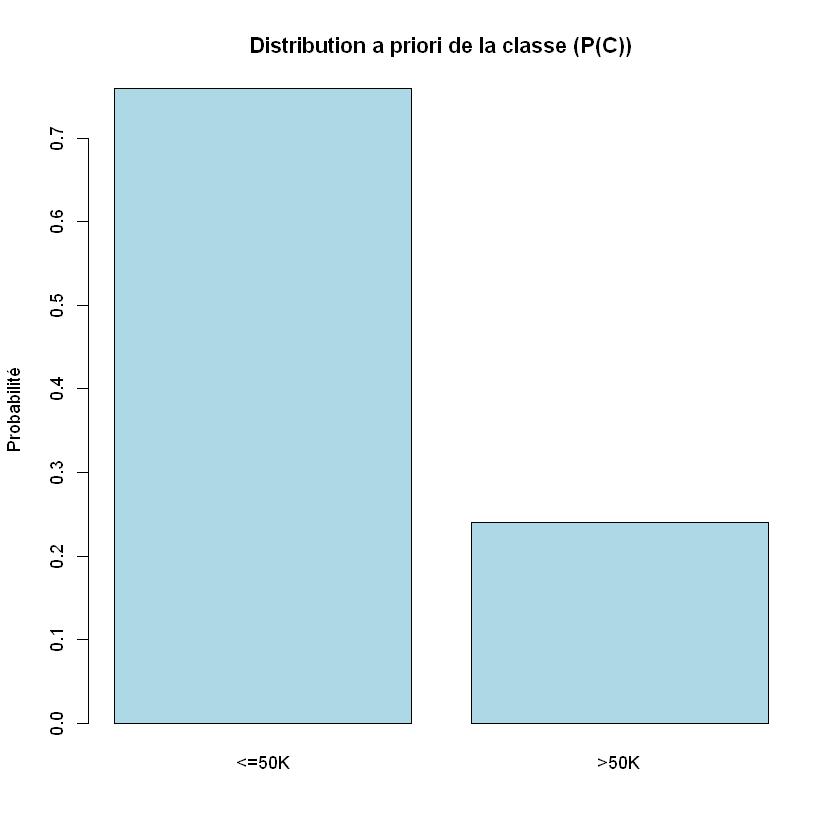

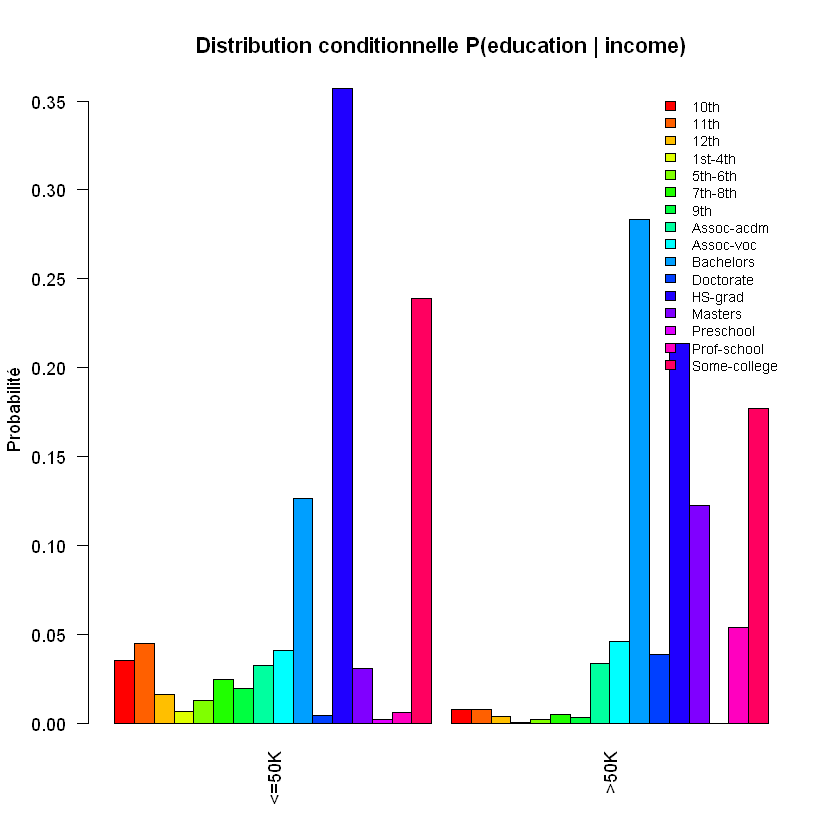

In [46]:
par(bg = "white")
par(cex = 0.9)  # Taille du texte

# Barplot 1 : distribution a priori
barplot(
  prop.table(table(myData$income)),
  main = "Distribution a priori de la classe (P(C))",
  ylab = "Probabilité",
  col = "lightblue"
)

# Barplot 2 : distribution conditionnelle
tab <- prop.table(table(myData$income, myData$education), margin = 1)

# Création du graphique
bp <- barplot(
  t(tab),
  beside = TRUE,
  las = 2,
  col = rainbow(ncol(tab)),
  main = "Distribution conditionnelle P(education | income)",
  ylab = "Probabilité"
)

# Ajout de la légende à droite
legend("topright",               # ou "right", ou coordonnées (x, y)
       legend = colnames(tab),
       fill = rainbow(ncol(tab)),
       cex = 0.8,
       bty = "n")                # pas de boîte autour de la légende
